# Threshold-Based Segmentation

---
## Learning Objectives
By the end of this module, you will be able to:
- Understand different thresholding techniques: fixed, mean, median, and Otsu’s method.
- Apply these techniques to segment objects in grayscale images.
- Generate binary masks from grayscale images.
- Visually validate masks by overlaying them on the original image.
- Implement and compare different thresholding strategies using Python.

---
## Thresholding
**Thresholding** is a simple and popular method for segmenting images by converting grayscale images into binary masks. It separates objects (usually brighter) from the background (usually darker).

**Key Concept:**
Given a grayscale image I, thresholding produces a binary image B such that:

```python
B[x, y] = 1 if I[x, y] > T else 0
```

*Where T is the threshold value.*

### Types of Thresholds
| Type       | Description                                                                 |
| ---------- | --------------------------------------------------------------------------- |
| **Fixed**  | You manually define a constant value `T`.                                   |
| **Mean**   | Threshold `T` is computed as the average pixel intensity.                   |
| **Median** | Threshold `T` is set to the median of all pixel intensities.                |
| **Otsu’s** | Automatically finds `T` by maximizing separation between object/background. |

### Binarization and Mask Creation
Once thresholding is applied, we obtain a binary mask:
- Pixel = 1 (white) → part of object (foreground)
- Pixel = 0 (black) → background

These masks are crucial for quantifying features, isolating structures, and further processing.

### Visual Validation Using Overlays
To verify the segmentation, we overlay the binary mask on top of the original image.

This helps to check if:
- The segmented regions align with actual structures.
- Background noise is included or excluded properly.

---
## Hands-on Coding
Let’s apply thresholding on a sample grayscale image.

**Setup**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, io, color

image = data.coins()  # Sample grayscale image

**Fixed Threshold**

In [2]:
fixed_T = 100
binary_fixed = image > fixed_T

**Mean Threshold**


In [3]:
mean_T = image.mean()
binary_mean = image > mean_T

**Median Threshold**

In [4]:
median_T = np.median(image)
binary_median = image > median_T

**Otsu’s Threshold**

In [5]:
otsu_T = filters.threshold_otsu(image)
binary_otsu = image > otsu_T

**Visualization Helper Function**

In [6]:
def show_overlay(image, mask, title):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    ax.imshow(mask, cmap='Reds', alpha=0.3)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

**Overlay Results**

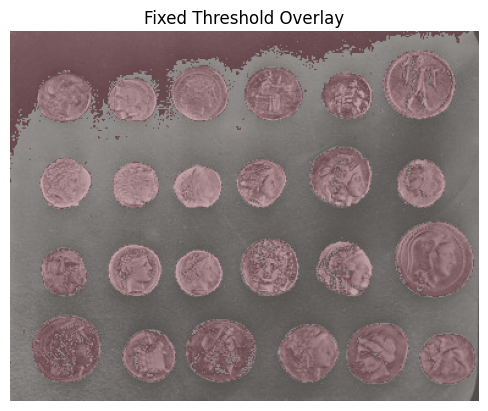

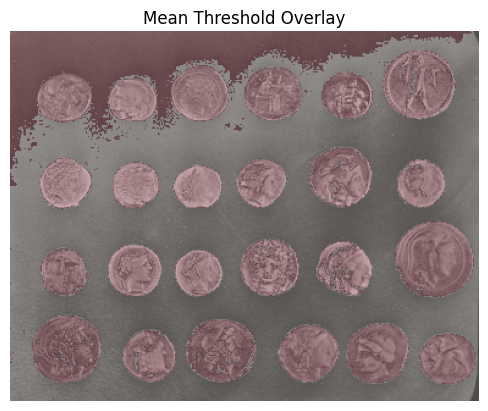

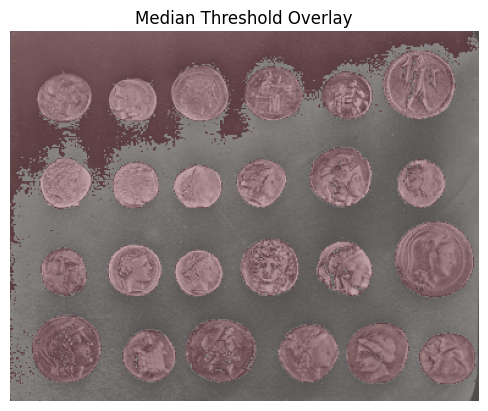

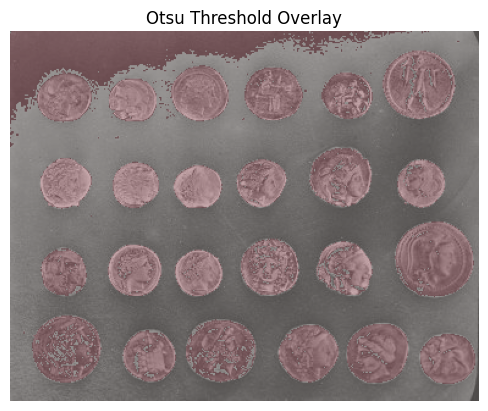

In [7]:
show_overlay(image, binary_fixed, "Fixed Threshold Overlay")
show_overlay(image, binary_mean, "Mean Threshold Overlay")
show_overlay(image, binary_median, "Median Threshold Overlay")
show_overlay(image, binary_otsu, "Otsu Threshold Overlay")

---
### Exercise
- Choose one of your own grayscale microscopy images or use the camera image from skimage.
- Apply all four thresholding techniques.
- Display each binary mask.
- Overlay each mask on the original image.

**Answer:**
1. Which method performed best?
2. Did Otsu’s method outperform fixed thresholding?
3. Are any structures incorrectly segmented?

---
## Mini Project
**Task:** Nuclei Segmentation from DAPI-stained Image

Use a sample DAPI-stained nuclei image (grayscale):

**Steps:**
- Load the image.
- Normalize and visualize histogram.
- Apply Otsu thresholding.
- Generate the binary mask.
- Overlay the binary mask on the original image.

**Calculate:**
- Number of segmented nuclei (label and regionprops can help)
- Area distribution of each segmented region

**Optional: Compare results from fixed vs Otsu.**

---
## Summary
| Concept                 | Description                                              |
| ----------------------- | -------------------------------------------------------- |
| Thresholding            | Separating image into object and background              |
| Fixed Threshold         | Manually set threshold value                             |
| Mean / Median Threshold | Set threshold based on image statistics                  |
| Otsu’s Method           | Automatically chooses best threshold for segmentation    |
| Binarization            | Converting image to black and white based on threshold   |
| Binary Mask             | Output of thresholding; used to isolate structures       |
| Visual Overlay          | Combine original and mask to check accuracy              |
| Hands-on                | Applied all threshold types on test images               |
| Project                 | Full pipeline from thresholding to object quantification |
